In [1]:
#First we will import all the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn as skl

In [2]:
#Calling the data file

file=pd.read_excel('C:/Users/91917/Desktop/HousePricePrediction.xlsx')
print(file.shape)
print(file.head())
print(file.tail())

(2919, 13)
   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond   
0   0          60       RL     8450    Inside     1Fam            5  \
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  
        Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond   
2914  2914         160  

In [3]:
#Calculating the different types of datatypes in the data file

obj = (file.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (file.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (file.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 4
Integer variables: 0
Float variables: 3


<Axes: title={'center': 'No. Unique values of Categorical Features'}>

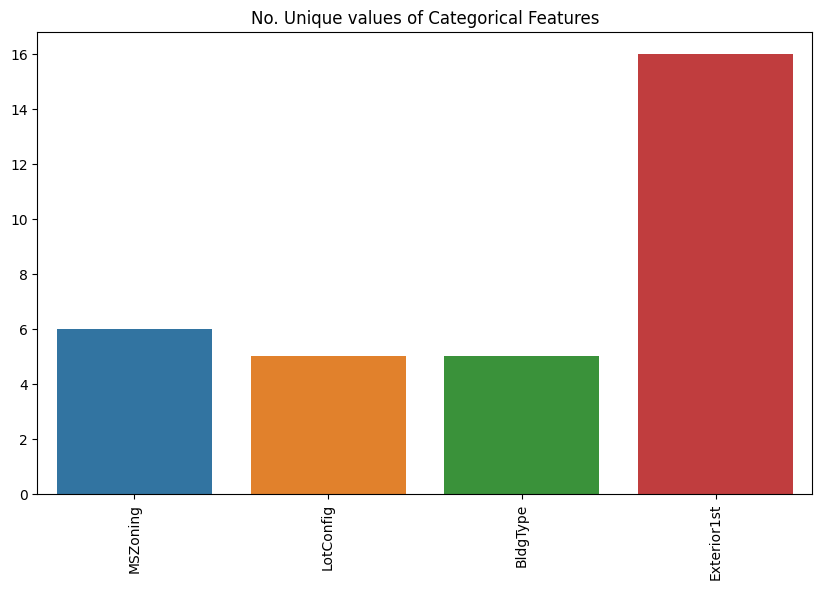

In [4]:
#Visualising different categories through barplot

unique_values = []
for col in object_cols:
  unique_values.append(file[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

C:\Users\91917\AppData\Local\Temp\ipykernel_13540\626728202.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11, 4, index)


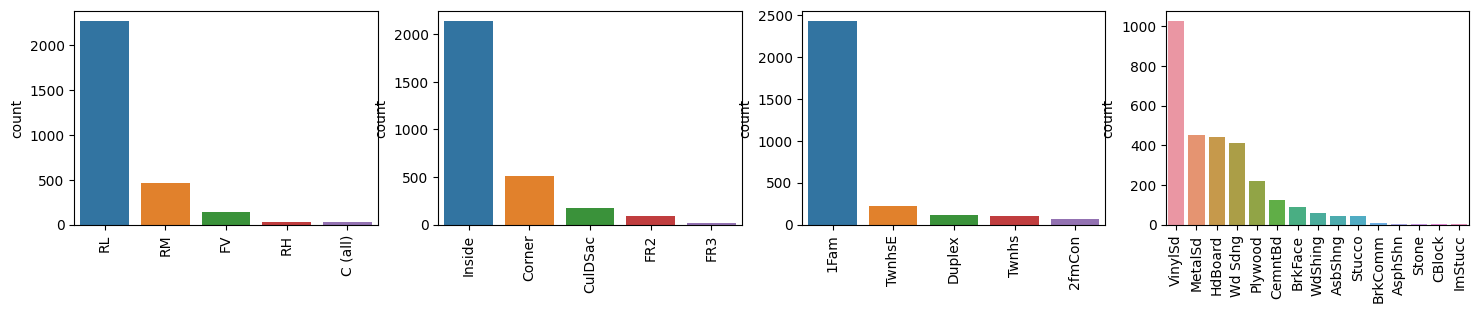

In [5]:
#Bargraph for each category

plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1
 
for col in object_cols:
    y = file[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

In [6]:
#Dimentionality Reduction
#Removing those columns that does not affect the outcome
#Removing ID column 

file.drop(['Id'],
             axis=1,
             inplace=True)

In [7]:
#Checking for missing values
file.isna().sum()

MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [8]:
'''Hence there are 4 missing values in MSZoning and 1 missing value in Exterior1st, BsmtFinSF2 and TotalBsmtSF. 
Also 1459 missing values in SalesPrice'''
#Filling the missing values with the mean of their respected columns

file['SalePrice'] = file['SalePrice'].fillna(file['SalePrice'].mean())
file['BsmtFinSF2'] = file['BsmtFinSF2'].fillna(file['BsmtFinSF2'].mean())
file['TotalBsmtSF'] = file['TotalBsmtSF'].fillna(file['TotalBsmtSF'].mean())
file = file.drop(columns=['Exterior1st'])
file.isna().sum()

MSSubClass      0
MSZoning        4
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [9]:
'''Extracting the input and output variables from the dataset. Here x is the input variable and y is the output variable.'''

x = file.iloc[:,:-1].values
y = file.iloc[:,-1].values
print(x)
print(y)

[[60 'RL' 8450 ... 2003 0.0 856.0]
 [20 'RL' 9600 ... 1976 0.0 1262.0]
 [60 'RL' 11250 ... 2002 0.0 920.0]
 ...
 [20 'RL' 20000 ... 1996 0.0 1224.0]
 [85 'RL' 10441 ... 1992 0.0 912.0]
 [60 'RL' 9627 ... 1994 0.0 996.0]]
[208500.         181500.         223500.         ... 180921.19589041
 180921.19589041 180921.19589041]


In [10]:
#Converting string column to integer, since all the data must be in integer form.

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[4])],remainder='passthrough')
x = ct.fit_transform(x)
print(x)

[[1.0 0.0 0.0 ... 2003 0.0 856.0]
 [1.0 0.0 0.0 ... 1976 0.0 1262.0]
 [1.0 0.0 0.0 ... 2002 0.0 920.0]
 ...
 [1.0 0.0 0.0 ... 1996 0.0 1224.0]
 [1.0 0.0 0.0 ... 1992 0.0 912.0]
 [1.0 0.0 0.0 ... 1994 0.0 996.0]]


In [11]:
#Conforming if there are any null values or outliers present yet

new_file = file.dropna()
new_file.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [12]:
from sklearn.preprocessing import OneHotEncoder
 
s = (new_file.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
      len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType']
No. of. categorical features:  3


In [13]:
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_file[object_cols]))
OH_cols.index = new_file.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_file.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

C:\Users\91917\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [14]:
#Splitting data into training and testing datasets

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
 
X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']
 
# Split the training set into 
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [15]:
#Testing accuracy using SVM

from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error
 
model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)
 
print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.18237942204698107


In [16]:
#Testing accuracy using Linear Regression

from sklearn.linear_model import LinearRegression
 
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)
 
print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.1901996572842402


In [ ]:
#Hence we can see that SVM (0.18) is giving much better accuracy than Lineear Reression (0.19)